### Aula 2 - Machine Learning com python
#### Analise exploratória de dados (EDA)

- Análise dos dados The Rolling Stones
- 1 - Importar o conjunto de dados
- 2 - entender a composição da nossa base de dados
- 3 - Preparar a nossa base de dados para leitura e compreensão
- 4 - Realizar análises estatísticas preliminares - Análise descritiva
- 5 - Compreender as variáveis
- 6 - Estudo das relações entre as variáveis
- 7 - Insights (debate e conclusões)


### Case Spotify

- name = nome da música
- álbum = nome do álbum
- release_date = data que o álbum foi lançado
- número da faixa = Ordem que a música aparece no álbum 
- id = id do Spotify para a música
- uri = uri do Spotify para a música
- acústica de 0,0 a 1,0 confiança de que a faixa é acústica
- danceability = o quanto a faixa é adequada pra dançar 0,0 a 1,0
- energia = representa a medida perceptiva de intensidade e atividade em 0,0 a 1,0 
- instrumentalness = precê se a faixa não contém cocais, também de 0,0 a 1,0 
- vivacidade = detecta a presença de uma audiência na gravação onde valores acime de 0,8 há a probabilidade de ter sido ao vivo
- loudness = volume geral de uma faixa em decibéis de -60 a 0
- locução = presença de palavras faladas em uma faixa
- tempo = tempo geral estimado de uma faixa 
- valência = uma medida de 0,0 a 1 que descreve a positividade musical transmitida por um faixa
- popularidade = a popularidade de uma musica de 0 a 100
- duration_ms = a duração da faixa em milissegundos


In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("dataset_rolling_stones.xlsx")
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [6]:
df.shape

(1610, 15)

In [7]:
print("Data inicial: ", df["release_date"].min())

Data inicial:  1964-04-16 00:00:00


In [8]:
print("Data final: ", df["release_date"].max())

Data final:  2022-06-10 00:00:00


In [9]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [10]:
df.duplicated().sum()

6

In [11]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [12]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000


In [13]:
df["duracao_em_min"] = df["duration_ms"] / 60000
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [14]:
df.groupby("album")["duracao_em_min"].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

In [15]:
import matplotlib.pyplot as plt

In [16]:
df_maior_duracao_musica = df.groupby("album")["duracao_em_min"].mean().sort_values(ascending=False)

In [17]:
df_maior_duracao_musica

album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duracao_em_min, Length: 90, dtype: float64

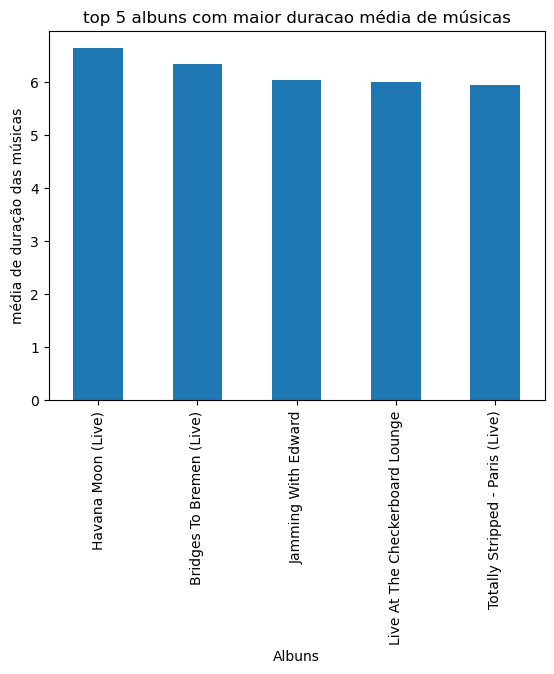

In [18]:
df_maior_duracao_musica.head(5).plot(kind="bar")
plt.xlabel("Albuns")
plt.ylabel("média de duração das músicas")
plt.title("top 5 albuns com maior duracao média de músicas")
plt.show()

In [19]:
top_albuns = df["album"].value_counts().head(10)

In [20]:
top_albuns

Voodoo Lounge Uncut (Live)         56
Honk (Deluxe)                      47
Live Licks                         46
Tattoo You (Super Deluxe)          46
Some Girls (Deluxe Version)        44
Goats Head Soup (Deluxe)           37
Flashpoint                         34
Sticky Fingers (Super Deluxe)      33
On Air (Deluxe)                    32
Live At The Checkerboard Lounge    32
Name: album, dtype: int64

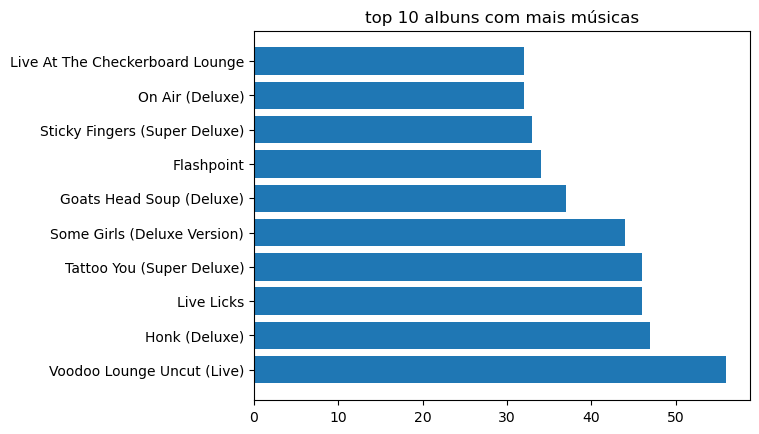

In [21]:
top_albuns = df["album"].value_counts().head(10)
plt.barh(top_albuns.index, top_albuns.values)
plt.title("top 10 albuns com mais músicas")
plt.show()

In [22]:
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2011"), pd.to_datetime("2020"))]

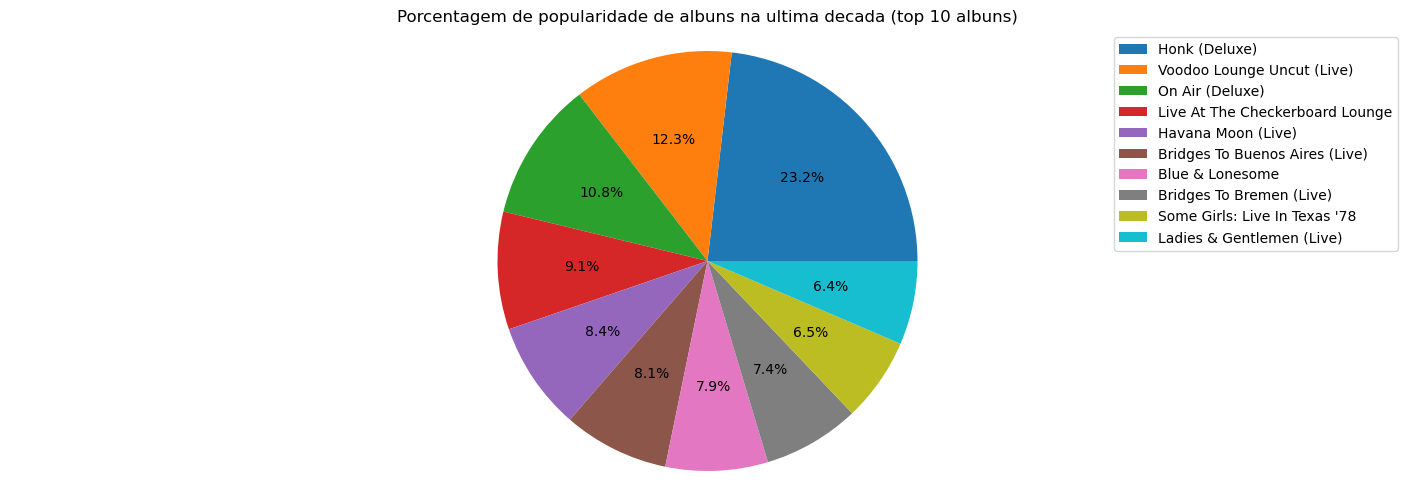

In [23]:
df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().sort_values(ascending=False).head(10)

total_popularidade = df_por_album.sum()

df_porcentagem = df_por_album / total_popularidade * 100

label = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis("equal")
plt.title("Porcentagem de popularidade de albuns na ultima decada (top 10 albuns)")
plt.legend(label, loc="best")
plt.show()

In [24]:
df_por_album

album
Honk (Deluxe)                      1232
Voodoo Lounge Uncut (Live)          654
On Air (Deluxe)                     573
Live At The Checkerboard Lounge     482
Havana Moon (Live)                  445
Bridges To Buenos Aires (Live)      433
Blue & Lonesome                     419
Bridges To Bremen (Live)            396
Some Girls: Live In Texas '78       344
Ladies & Gentlemen (Live)           343
Name: popularity, dtype: int64

In [25]:
import seaborn as sns

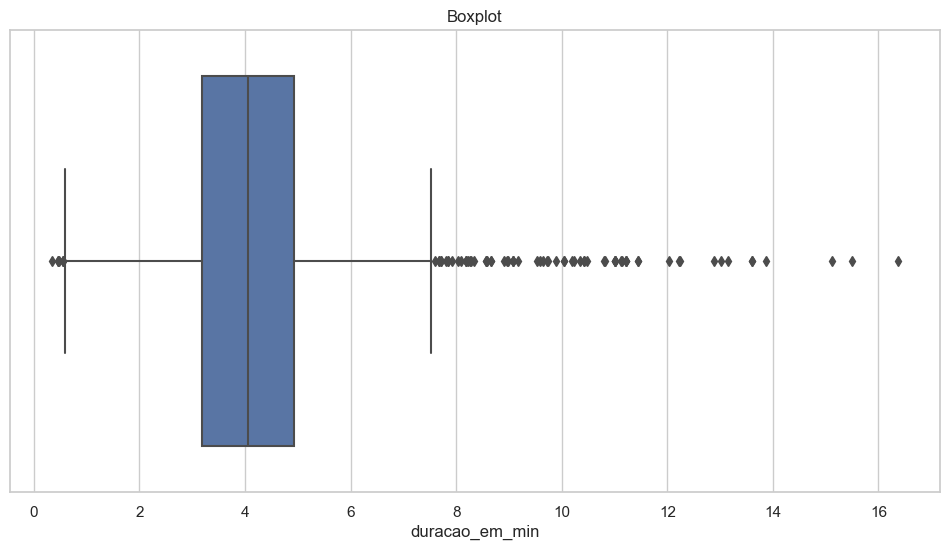

In [26]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x="duracao_em_min", data=df)
axes.set_title("Boxplot")
plt.show()

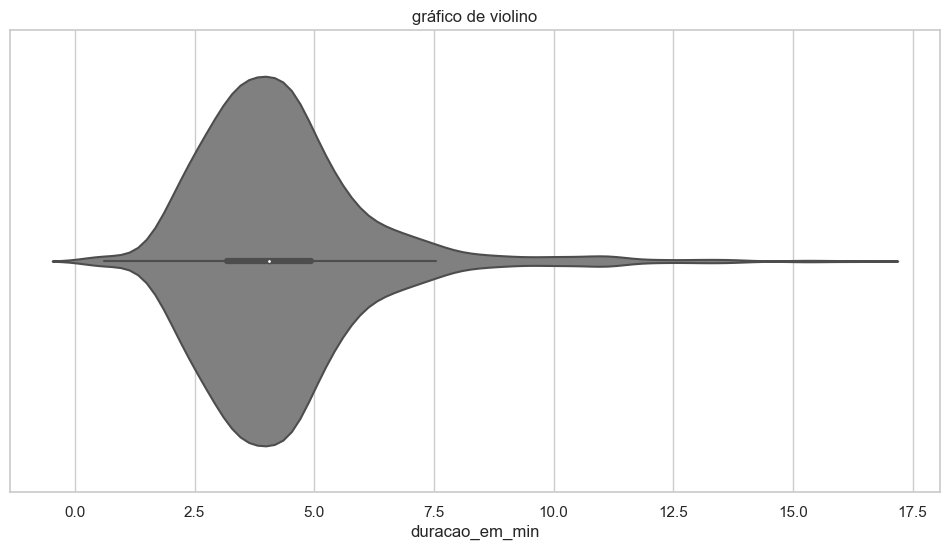

In [27]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x="duracao_em_min", data=df, color="gray")
axes.set_title("gráfico de violino")
plt.show()

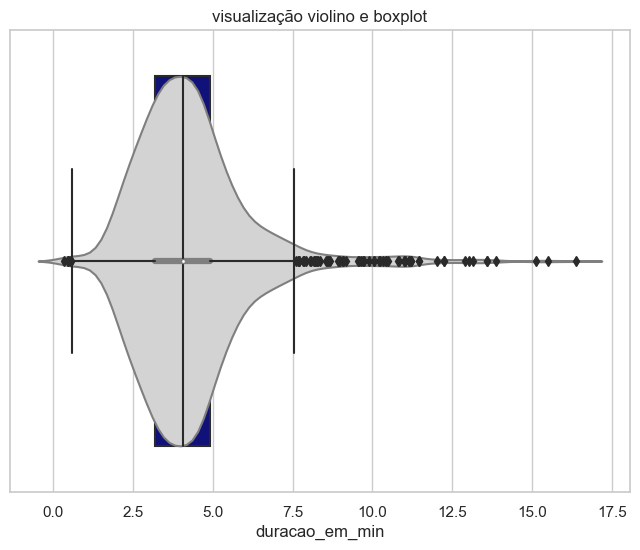

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

sns.violinplot(x="duracao_em_min", data=df, ax=ax, color="lightgray")
sns.boxplot(x="duracao_em_min", data=df, ax=ax, whis=1.5, color="darkblue")

ax.set_title("visualização violino e boxplot")
plt.show()

In [29]:
def classifica_musica_ao_vivo(df):
    if df["liveness"] >= 0.8:
        return True
    else:
        return False

In [30]:
df["ao_vivo"] = df.apply(classifica_musica_ao_vivo, axis=1)

In [31]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True


In [32]:
df.groupby("ao_vivo")["ao_vivo"].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [33]:
df_gravado_em_studio = df[df["ao_vivo"] == False]
df_show_ao_vivo = df[df["ao_vivo"] == True]

In [34]:
df_gravado_em_studio.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.2750,0.340,0.956,0.12500,0.741,-5539.0,0.0915,101628.0,0.125,31,244293,4.071550,False
23,Honky Tonk Women - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,1,0.1620,0.430,0.901,0.01100,0.694,-6215.0,0.0450,112077.0,0.890,32,216546,3.609100,False
25,Hand Of Fate - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,3,0.0654,0.477,0.899,0.03760,0.727,-6189.0,0.0425,129991.0,0.805,29,267866,4.464433,False
26,Route 66 - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,4,0.0975,0.473,0.923,0.00157,0.722,-6204.0,0.0791,144625.0,0.792,30,193653,3.227550,False
28,Crazy Mama - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,6,0.0288,0.447,0.883,0.00554,0.726,-6266.0,0.0371,117604.0,0.556,29,299213,4.986883,False


In [35]:
print("Média das músicas ao vivo: ", df_show_ao_vivo["duracao_em_min"].mean())

Média das músicas ao vivo:  5.088648962516734


In [36]:
print("Média das músicas em studio: ", df_gravado_em_studio["duracao_em_min"].mean())

Média das músicas em studio:  3.940451363908873


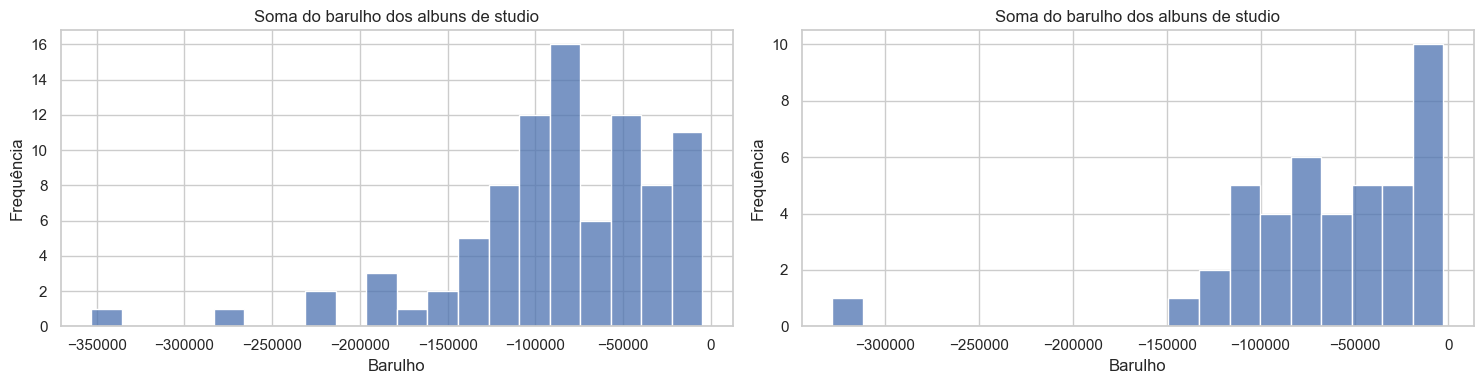

In [39]:
df_studio = df_gravado_em_studio.groupby("album")["loudness"].sum()
df_ao_vivo = df_show_ao_vivo.groupby("album")["loudness"].sum()

fig, axes = plt.subplots(1, 2, figsize=(15,4))

sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title("Soma do barulho dos albuns de studio")
axes[0].set_xlabel("Barulho")
axes[0].set_ylabel("Frequência")

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title("Soma do barulho dos albuns de studio")
axes[1].set_xlabel("Barulho")
axes[1].set_ylabel("Frequência")

fig.tight_layout()
plt.show()

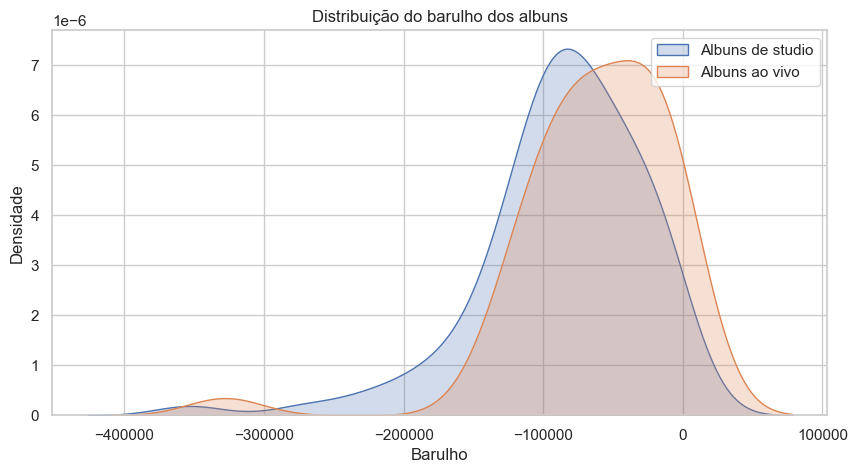

In [40]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_studio, label="Albuns de studio", fill=True)
sns.kdeplot(data=df_ao_vivo, label="Albuns ao vivo", fill=True)

plt.title("Distribuição do barulho dos albuns")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend()

### Testes estatísticos

In [41]:
from scipy.stats import shapiro

In [42]:
stat, p = shapiro(df_studio)
print("Soma do barulho dos albuns de studio: ")
print("Estatística de teste: {:.4f}, valor p: {}". format(stat, p))

if p > 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")
    

Soma do barulho dos albuns de studio: 
Estatística de teste: 0.8958, valor p: 3.2961095257633133e-06
A hipótese de normalidade é rejeitada


In [43]:
stat, p = shapiro(df_ao_vivo)
print("Soma do barulho dos albuns ao vivo: ")
print("Estatística de teste: {:.4f}, valor p: {}". format(stat, p))

if p > 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")

Soma do barulho dos albuns ao vivo: 
Estatística de teste: 0.7913, valor p: 2.35057973441144e-06
A hipótese de normalidade é rejeitada


In [44]:
from scipy.stats import mannwhitneyu

In [47]:
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative="less")

print("Estatística de teste U: ", stat)
print("Valor p: ", p)

alpha = 0.05
if p < alpha:
    print("Diferença estatisticamente significante")
else:
    print("Não há difetença estatisticamente significante")

Estatística de teste U:  1367.0
Valor p:  0.0050727361177996585
Diferença estatisticamente significante


## _________________________________


### Análise de correlação

In [49]:
media_por_album = df.groupby("album")["valence"].mean().reset_index()

media_por_album = media_por_album.rename(columns={"valence": "media_valence"})

media_por_album["sentimento"] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album["media_valence"]]

media_por_album.groupby("sentimento")["sentimento"].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [50]:
media_por_album.head(2)

,album,media_valence,sentimento
0,12 X 5,0.704000,positivo
1,12 x 5,0.689917,positivo


In [51]:
df_resultado_final = pd.merge(df, media_por_album, on = "album")
df_resultado_final.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,negativo


In [53]:
matriz_correlacao = df_resultado_final.corr()

correlacao_sentimento = matriz_correlacao["media_valence"]

display(correlacao_sentimento)

C:\Users\lanam\AppData\Local\Temp\ipykernel_38852\1998958698.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = df_resultado_final.corr()


track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duracao_em_min     -0.309499
ao_vivo            -0.549736
media_valence       1.000000
Name: media_valence, dtype: float64

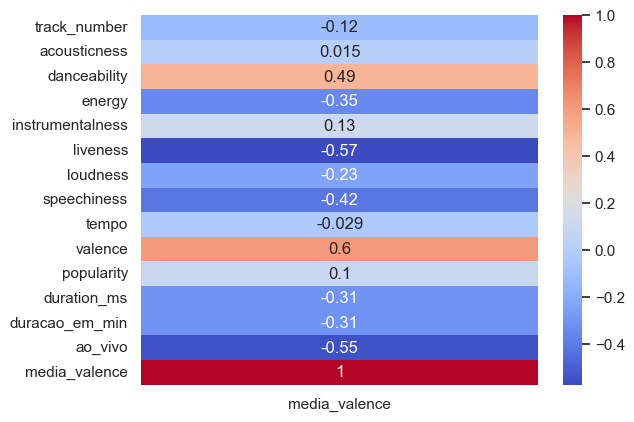

In [54]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap = "coolwarm")
plt.show()

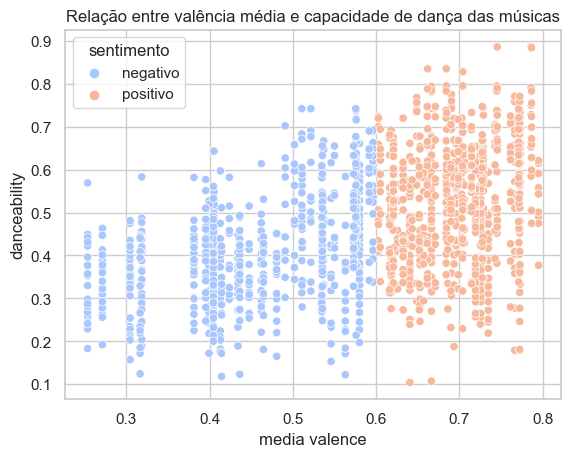

In [55]:
sns.scatterplot(x="media_valence", y="danceability", hue="sentimento", data=df_resultado_final, palette = "coolwarm")
plt.xlabel("media valence")
plt.ylabel("danceability")
plt.title("Relação entre valência média e capacidade de dança das músicas")
plt.show()

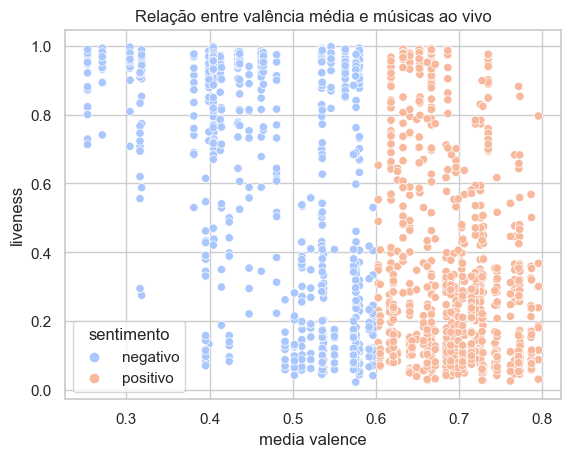

In [56]:
sns.scatterplot(x="media_valence", y="liveness", hue="sentimento", data=df_resultado_final, palette = "coolwarm")
plt.xlabel("media valence")
plt.ylabel("liveness")
plt.title("Relação entre valência média e músicas ao vivo")
plt.show()